In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame manually with Premier League winners, their top scorer, and the league top scorer
data = {
    "Season": [
        "1992-93", "1993-94", "1994-95", "1995-96", "1996-97", 
        "1997-98", "1998-99", "1999-2000", "2000-01", "2001-02",
        "2002-03", "2003-04", "2004-05", "2005-06", "2006-07", 
        "2007-08", "2008-09", "2009-10", "2010-11", "2011-12", 
        "2012-13", "2013-14", "2014-15", "2015-16", "2016-17", 
        "2017-18", "2018-19", "2019-20", "2020-21", "2021-22", 
        "2022-23", "2023-24"
    ],
    "Champion": [
        "Manchester United", "Manchester United", "Blackburn Rovers", 
        "Manchester United", "Manchester United", "Arsenal", 
        "Manchester United", "Manchester United", "Manchester United", 
        "Arsenal", "Manchester United", "Arsenal", "Chelsea", 
        "Chelsea", "Manchester United", "Manchester United", 
        "Manchester United", "Chelsea", "Manchester United", 
        "Manchester City", "Manchester United", "Manchester City", 
        "Chelsea", "Leicester City", "Chelsea", "Manchester City", 
        "Manchester City", "Liverpool", "Manchester City", 
        "Manchester City", "Manchester City", "Manchester City"
    ],
    "Champion Top Scorer": [
        "Mark Hughes", "Eric Cantona", "Alan Shearer", "Eric Cantona", 
        "Ole Gunnar Solskjær", "Dennis Bergkamp", "Dwight Yorke", 
        "Dwight Yorke", "Teddy Sheringham", "Thierry Henry", 
        "Ruud van Nistelrooy", "Thierry Henry", "Frank Lampard", 
        "Frank Lampard", "Cristiano Ronaldo", "Cristiano Ronaldo", 
        "Cristiano Ronaldo", "Didier Drogba", "Dimitar Berbatov", 
        "Sergio Agüero", "Robin van Persie", "Yaya Touré", 
        "Diego Costa", "Jamie Vardy", "Diego Costa", 
        "Sergio Agüero", "Sergio Agüero", "Mohamed Salah", 
        "Ilkay Güdogan", "Kevin De Bruyne", "Erling Haaland", "Erling Haaland"
    ],
    "Champion Top Scorer Position": [
        "FW", "FW", "ST", "FW", 
        "ST", "FW", "ST", "ST", 
        "ST", "FW", "ST", "FW", 
        "AM", "AM", "Winger", 
        "Winger", "Winger", "ST", "FW", "ST", 
        "ST", "CM", "ST", "ST", 
        "ST", "ST", "ST", "Winger", 
        "CM", "AM", "ST", "ST"
    ],
    "League Top Scorer": [
        "Teddy Sheringham", "Andy Cole", "Alan Shearer", "Alan Shearer", 
        "Alan Shearer", "Chris Sutton", "Dwight Yorke", "Kevin Phillips", 
        "Jimmy Floyd Hasselbaink", "Thierry Henry", "Ruud van Nistelrooy", 
        "Thierry Henry", "Thierry Henry", "Thierry Henry", 
        "Didier Drogba", "Cristiano Ronaldo", "Nicolas Anelka", 
        "Didier Drogba", "Dimitar Berbatov", "Robin van Persie", 
        "Robin van Persie", "Luis Suárez", "Sergio Agüero", 
        "Harry Kane", "Harry Kane", "Mohamed Salah", "Mohamed Salah", 
        "Jamie Vardy", "Harry Kane", "Mohamed Salah", "Erling Haaland", "Erling Haaland"
    ],
    "League Top Scorer Position": [
        "ST", "ST", "ST", "ST", 
        "ST", "ST", "ST", "ST", 
        "ST", "FW", "ST", "FW", 
        "FW", "FW", "ST", "Winger", 
        "ST", "ST", "FW", "ST", 
        "ST", "ST", "ST", "ST", 
        "ST", "Winger", "Winger", "ST", 
        "ST", "Winger", "ST", "ST"
    ]
}

df = pd.DataFrame(data)

# Add a column to indicate if the league's top scorer is from the champion team
df['League Top Scorer in Champion Team'] = df["Champion Top Scorer"] == df["League Top Scorer"]

# Save the DataFrame to a CSV file for future analysis
df.to_csv("premier_league_analysis.csv", index=False)

# Display the DataFrame
df.head(5)

,Season,Champion,Champion Top Scorer,Champion Top Scorer Position,League Top Scorer,League Top Scorer Position,League Top Scorer in Champion Team
0,1992-93,Manchester United,Mark Hughes,FW,Teddy Sheringham,ST,False
1,1993-94,Manchester United,Eric Cantona,FW,Andy Cole,ST,False
2,1994-95,Blackburn Rovers,Alan Shearer,ST,Alan Shearer,ST,True
3,1995-96,Manchester United,Eric Cantona,FW,Alan Shearer,ST,False
4,1996-97,Manchester United,Ole Gunnar Solskjær,ST,Alan Shearer,ST,False


In [39]:
# Additional Analysis:
# 1. Percentage of champions with the league's top scorer
percent_with_top_scorer = top_scorer_won_league[1] / top_scorer_won_league.sum() * 100
print(f"Percentage of champions with the league's top scorer: {percent_with_top_scorer:.2f}%")

Percentage of champions with the league's top scorer: 34.38%


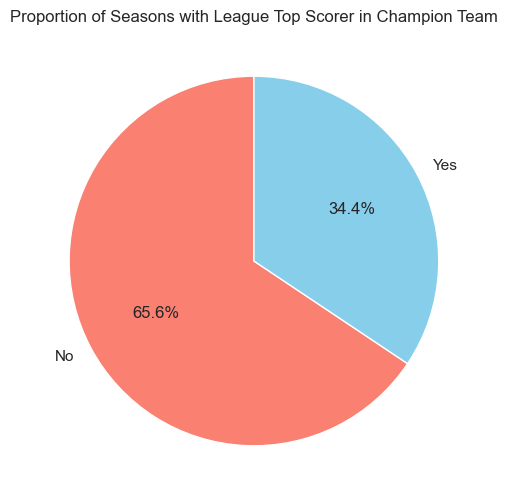

In [40]:
# Pie chart for League Top Scorer in Champion Team
top_scorer_pie = df['League Top Scorer in Champion Team'].value_counts()

plt.figure(figsize=(6, 6))
top_scorer_pie.plot(kind='pie', labels=['No', 'Yes'], autopct='%1.1f%%', colors=["salmon", "skyblue"], startangle=90)
plt.title("Proportion of Seasons with League Top Scorer in Champion Team")
plt.ylabel("")  # Removes the default y-axis label
plt.show()

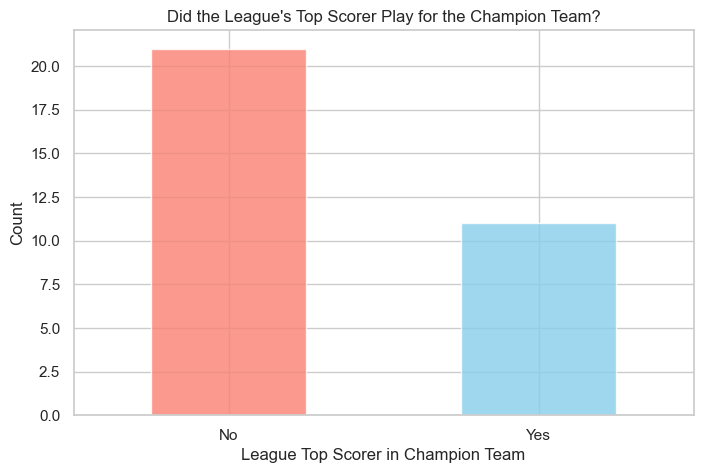

In [38]:
# Create a chart to show if the top scorer's team won the league
top_scorer_won_league = df['League Top Scorer in Champion Team'].value_counts()

plt.figure(figsize=(8, 5))
top_scorer_won_league.plot(kind='bar', color=["salmon", "skyblue"], alpha=0.8)
plt.title("Did the League's Top Scorer Play for the Champion Team?")
plt.xticks([0, 1], labels=['No', 'Yes'], rotation=0)
plt.ylabel("Count")
plt.xlabel("League Top Scorer in Champion Team")
plt.show()

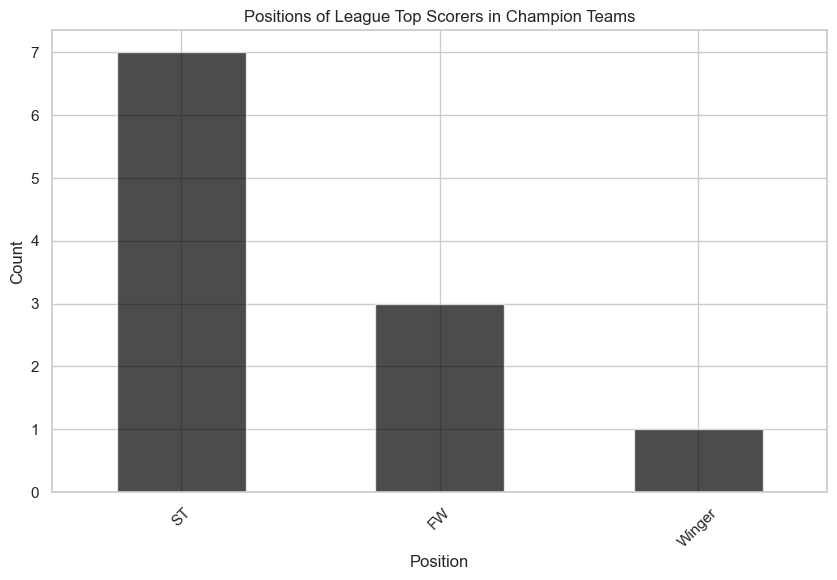

In [36]:
# Create a chart to show positions of players who won the league as top scorer
positions_won_league = df[df["League Top Scorer in Champion Team"]]["Champion Top Scorer Position"].value_counts()

plt.figure(figsize=(10, 6))
positions_won_league.plot(kind='bar', color='black', alpha=0.7)
plt.title("Positions of League Top Scorers in Champion Teams")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.xlabel("Position")
plt.show()

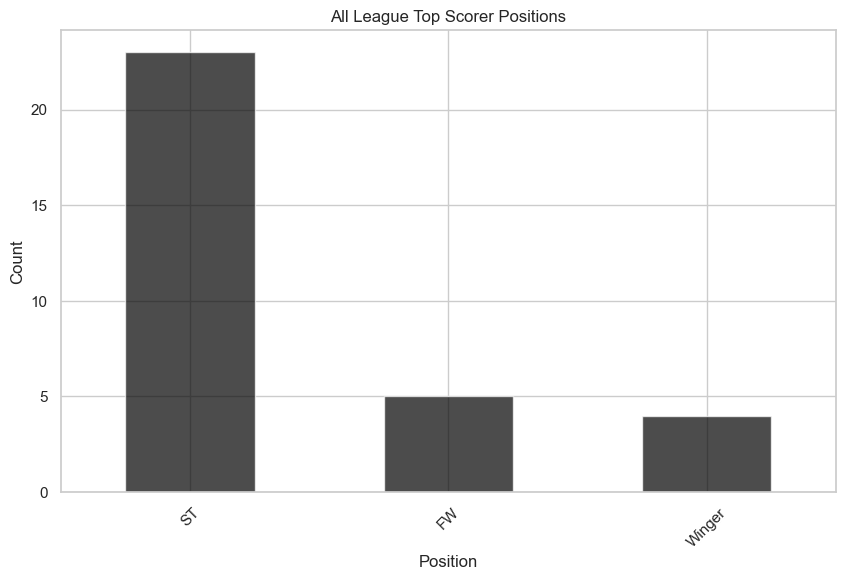

In [33]:
# Create a chart to compare all top scorer positions (champion and non-champion)
all_positions = df["League Top Scorer Position"].value_counts()

plt.figure(figsize=(10, 6))
all_positions.plot(kind='bar', color='black', alpha=0.7)
plt.title("All League Top Scorer Positions")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.xlabel("Position")
plt.show()

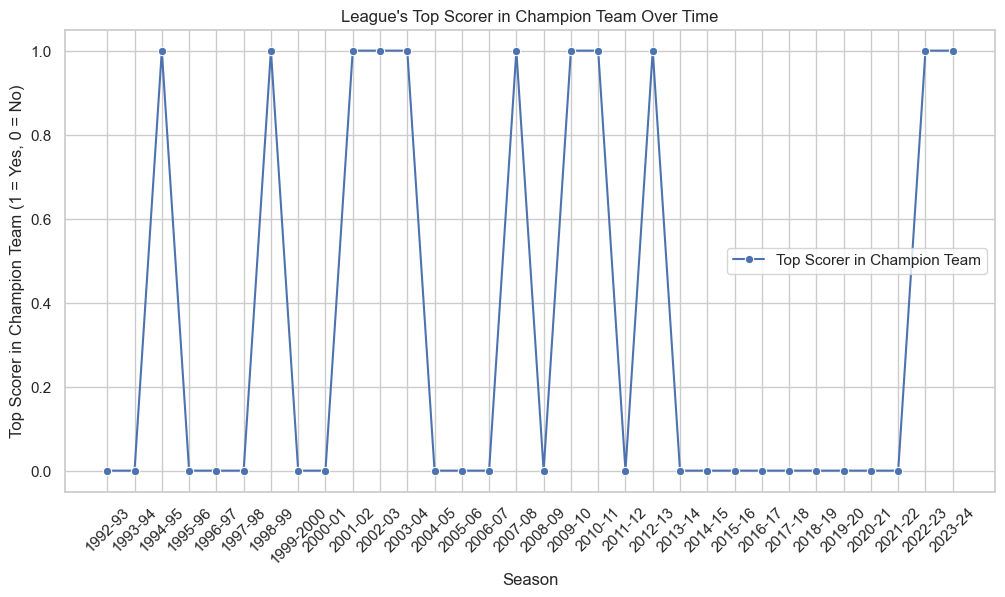

In [22]:
# Plot of seasons where league's top scorer was in champion team
plt.figure(figsize=(12, 6))
sns.lineplot(x="Season", y="League Top Scorer in Champion Team", data=df, marker="o", label="Top Scorer in Champion Team")
plt.title("League's Top Scorer in Champion Team Over Time")
plt.xticks(rotation=45)
plt.ylabel("Top Scorer in Champion Team (1 = Yes, 0 = No)")
plt.xlabel("Season")
plt.legend()
plt.show()
